### Importing relevant packages

In [1]:
import re
import matplotlib.pyplot as plt
import string
from nltk.tokenize.treebank import TreebankWordDetokenizer
from gensim.utils import simple_preprocess
import gensim
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import nltk

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers.wrappers import Bidirectional

In [3]:
import pandas
import pickle
import bz2
import _pickle as cPickle
import zipfile
from tqdm import tqdm

# Loading training data

In [ ]:
path_train  = r'C:\Users\chriq\OneDrive\Documents\my_data\MLdata\train_set.zip' 
train.to_pickle(path_train, compression='zip', protocol=4, storage_options=None)
path_test  = r'C:\Users\chriq\OneDrive\Documents\my_data\MLdata\test_set.zip' 
test.to_pickle(path_test, compression='zip', protocol=4, storage_options=None)

In [4]:
train=pd.read_pickle(r'C:\Users\chriq\OneDrive\Documents\my_data\MLdata\train_set.zip' )

# Trying LDA to vectorize corpus

In [5]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk

In [6]:
train

,obfuscated_bool,js,obfuscator_name,js_length,num_spaces,num_parenthesis,num_slash,num_plus,num_point,num_comma,...,num_numeric,ratio_spaces,ratio_alpha,ratio_numeric,ratio_parenthesis,ratio_slash,ratio_plus,ratio_point,ratio_comma,ratio_semicolon
115028,1,"\nvar a0_0x5108 = [\n 'onreadystatechange',...",obfuscator_io,4138,1057,178,0,8,0,56,...,972,0.255437,0.580957,0.234896,0.043016,0.000000,0.001933,0.000000,0.013533,0.008942
85481,0,\n\n\n\n\n\ngoog.provide('goog.dom');\ngoog.pr...,0,49232,8591,867,25,29,1248,229,...,152,0.174500,0.680817,0.003087,0.017610,0.000508,0.000589,0.025349,0.004651,0.008084
24018,0,"\n\nMathJax.OutputJax.SVG.FONTDATA.FONTS[""STIX...",0,30618,6448,2,4,1,10,327,...,18175,0.210595,0.651773,0.593605,0.000065,0.000131,0.000033,0.000327,0.010680,0.000065
184850,1,"var a0_0x3281 = [\n '165473rekVYY',\n '1...",obfuscator_io,1295,267,74,0,6,0,19,...,323,0.206178,0.611583,0.249421,0.057143,0.000000,0.004633,0.000000,0.014672,0.009266
128047,1,"\n(function ($fog$136, $fog$0, $fog$1, $fog$2,...",jfogs,14673,1767,800,15,4,2,334,...,1363,0.120425,0.584816,0.092892,0.054522,0.001022,0.000273,0.000136,0.022763,0.015062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83486,0,"CKEDITOR.plugins.setLang(""colordialog"",""nb"",{c...",0,145,3,2,0,0,2,6,...,0,0.020690,0.758621,0.000000,0.013793,0.000000,0.000000,0.013793,0.041379,0.006897
124699,1,"(function(){function a(f,g){var b=new Array(5)...",defendjs,4866,61,436,0,113,62,273,...,1326,0.012536,0.590629,0.272503,0.089601,0.000000,0.023222,0.012741,0.056104,0.047267
135210,1,"var a0_0x1e51 = [\n 'goog.array',\n 'get...",obfuscator_io,30096,3337,1906,2,48,44,543,...,8666,0.110879,0.684875,0.287945,0.063331,0.000066,0.001595,0.001462,0.018042,0.005283
79248,0,\n\n\nfunction testcase() {\n function ...,0,682,223,28,0,0,7,3,...,15,0.326979,0.517595,0.021994,0.041056,0.000000,0.000000,0.010264,0.004399,0.019062


In [7]:
train['js_splitted']=train.js.apply(lambda x: x.split())

In [8]:
train.drop(columns='obfuscator_name',inplace=True)

In [9]:
train

,obfuscated_bool,js,js_length,num_spaces,num_parenthesis,num_slash,num_plus,num_point,num_comma,num_semicolon,...,ratio_spaces,ratio_alpha,ratio_numeric,ratio_parenthesis,ratio_slash,ratio_plus,ratio_point,ratio_comma,ratio_semicolon,js_splitted
115028,1,"\nvar a0_0x5108 = [\n 'onreadystatechange',...",4138,1057,178,0,8,0,56,37,...,0.255437,0.580957,0.234896,0.043016,0.000000,0.001933,0.000000,0.013533,0.008942,"[var, a0_0x5108, =, [, 'onreadystatechange',, ..."
85481,0,\n\n\n\n\n\ngoog.provide('goog.dom');\ngoog.pr...,49232,8591,867,25,29,1248,229,398,...,0.174500,0.680817,0.003087,0.017610,0.000508,0.000589,0.025349,0.004651,0.008084,"[goog.provide('goog.dom');, goog.provide('goog..."
24018,0,"\n\nMathJax.OutputJax.SVG.FONTDATA.FONTS[""STIX...",30618,6448,2,4,1,10,327,2,...,0.210595,0.651773,0.593605,0.000065,0.000131,0.000033,0.000327,0.010680,0.000065,"[MathJax.OutputJax.SVG.FONTDATA.FONTS[""STIXMat..."
184850,1,"var a0_0x3281 = [\n '165473rekVYY',\n '1...",1295,267,74,0,6,0,19,12,...,0.206178,0.611583,0.249421,0.057143,0.000000,0.004633,0.000000,0.014672,0.009266,"[var, a0_0x3281, =, [, '165473rekVYY',, '1966v..."
128047,1,"\n(function ($fog$136, $fog$0, $fog$1, $fog$2,...",14673,1767,800,15,4,2,334,221,...,0.120425,0.584816,0.092892,0.054522,0.001022,0.000273,0.000136,0.022763,0.015062,"[(function, ($fog$136,, $fog$0,, $fog$1,, $fog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83486,0,"CKEDITOR.plugins.setLang(""colordialog"",""nb"",{c...",145,3,2,0,0,2,6,1,...,0.020690,0.758621,0.000000,0.013793,0.000000,0.000000,0.013793,0.041379,0.006897,"[CKEDITOR.plugins.setLang(""colordialog"",""nb"",{..."
124699,1,"(function(){function a(f,g){var b=new Array(5)...",4866,61,436,0,113,62,273,230,...,0.012536,0.590629,0.272503,0.089601,0.000000,0.023222,0.012741,0.056104,0.047267,"[(function(){function, a(f,g){var, b=new, Arra..."
135210,1,"var a0_0x1e51 = [\n 'goog.array',\n 'get...",30096,3337,1906,2,48,44,543,159,...,0.110879,0.684875,0.287945,0.063331,0.000066,0.001595,0.001462,0.018042,0.005283,"[var, a0_0x1e51, =, [, 'goog.array',, 'getBrow..."
79248,0,\n\n\nfunction testcase() {\n function ...,682,223,28,0,0,7,3,13,...,0.326979,0.517595,0.021994,0.041056,0.000000,0.000000,0.010264,0.004399,0.019062,"[function, testcase(), {, function, callbackfn..."


In [10]:
input_list=train.js_splitted.values.tolist()

### Create LDA representation of the javaascript, creating a dictionnary of the words, filter non relevant data 

In [11]:
dictionary = gensim.corpora.Dictionary(input_list)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 !==
1 &&
2 '11965uxtVsM',
3 '12JKUDrI',
4 '144211xgZuKf',
5 '19819uQcLDB',
6 '22541IeDmnA',
7 '23gTblUy',
8 '4fmImNe',
9 '5389vkrBJI',
10 '5Mufwfu',


In [12]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [13]:
bow_corpus = [dictionary.doc2bow(doc) for doc in tqdm(input_list)]

100%|████████████████████████████████████████████████████████████████████████| 150040/150040 [01:01<00:00, 2439.54it/s]


In [14]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=15, id2word=dictionary, passes=2, workers=2)

In [15]:
lda_rep=[lda_model.get_document_topics(i,minimum_probability=0.0) for i in tqdm(bow_corpus)]

100%|████████████████████████████████████████████████████████████████████████| 150040/150040 [01:00<00:00, 2498.01it/s]


In [16]:
train_vecs=[]
for i in tqdm(lda_rep):
    vec=[x[1] for x in i]
    train_vecs.append(vec)
train_vecs

100%|███████████████████████████████████████████████████████████████████████| 150040/150040 [00:02<00:00, 55628.61it/s]


[[0.0006611935,
  0.0006611939,
  0.0006611938,
  0.00066119357,
  0.0006611945,
  0.00066119316,
  0.00066119386,
  0.9907433,
  0.00066119333,
  0.0006611946,
  0.00066119357,
  0.00066119357,
  0.00066119427,
  0.00066119333,
  0.0006611942],
 [1.4206356e-05,
  1.4206336e-05,
  1.4206331e-05,
  1.42063645e-05,
  0.015406182,
  1.420633e-05,
  0.015511557,
  1.4206377e-05,
  1.4206343e-05,
  1.42063645e-05,
  1.4206339e-05,
  1.4206368e-05,
  0.8817233,
  1.4206336e-05,
  0.08720274],
 [1.4468949e-05,
  1.4468946e-05,
  1.4468949e-05,
  1.4468946e-05,
  1.44689475e-05,
  1.4468946e-05,
  1.4468946e-05,
  1.4468946e-05,
  0.99979746,
  1.4468946e-05,
  1.4468946e-05,
  1.44689475e-05,
  1.4468946e-05,
  1.4468946e-05,
  1.4468949e-05],
 [0.0023861001,
  0.0023861027,
  0.0023860966,
  0.0023860969,
  0.0023860992,
  0.0023860966,
  0.0023860983,
  0.96659464,
  0.0023860969,
  0.0023860994,
  0.0023860969,
  0.0023860978,
  0.0023861048,
  0.0023860976,
  0.0023861008],
 [0.0001502226

### Create dummies as labels for the labels 

In [17]:
train['lda_rep']=train_vecs

In [18]:
labels=train.obfuscated_bool.to_numpy()
labels_onehot=pd.get_dummies(labels).values

In [19]:
labels_onehot

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [21]:
nn_input=np.array(train.lda_rep.to_list())
nn_input[0]

array([6.6119351e-04, 6.6119392e-04, 6.6119380e-04, 6.6119357e-04,
       6.6119450e-04, 6.6119316e-04, 6.6119386e-04, 9.9074328e-01,
       6.6119333e-04, 6.6119462e-04, 6.6119357e-04, 6.6119357e-04,
       6.6119427e-04, 6.6119333e-04, 6.6119421e-04], dtype=float32)

**Split dataset into train and validation data**m

In [23]:
X_train, X_test, y_train, y_test = train_test_split(nn_input,labels_onehot,train_size=0.8, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

120032 30008 120032 30008


**Add relevant metrics in order to measure while the model runs**

In [25]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [26]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(LSTM(units = 50))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy',f1_m])

history=model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs = 15, batch_size = 100)

Epoch 1/15
1201/1201 [==============================] - 21s 16ms/step - loss: 0.0617 - accuracy: 0.9233 - f1_m: 0.9212 - val_loss: 0.0185 - val_accuracy: 0.9788 - val_f1_m: 0.9789
Epoch 2/15
1201/1201 [==============================] - 20s 16ms/step - loss: 0.0186 - accuracy: 0.9794 - f1_m: 0.9792 - val_loss: 0.0190 - val_accuracy: 0.9791 - val_f1_m: 0.9792
Epoch 3/15
1201/1201 [==============================] - 21s 18ms/step - loss: 0.0166 - accuracy: 0.9818 - f1_m: 0.9816 - val_loss: 0.0154 - val_accuracy: 0.9829 - val_f1_m: 0.9829
Epoch 4/15
1201/1201 [==============================] - 21s 17ms/step - loss: 0.0155 - accuracy: 0.9825 - f1_m: 0.9825 - val_loss: 0.0138 - val_accuracy: 0.9840 - val_f1_m: 0.9840
Epoch 5/15
1201/1201 [==============================] - 21s 17ms/step - loss: 0.0141 - accuracy: 0.9833 - f1_m: 0.9833 - val_loss: 0.0120 - val_accuracy: 0.9859 - val_f1_m: 0.9859
Epoch 6/15
1201/1201 [==============================] - 21s 17ms/step - loss: 0.0131 - accuracy: 0.9

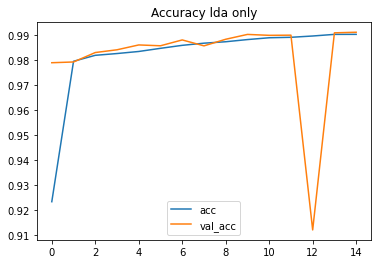

In [27]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy lda only')
plt.legend()
plt.show()

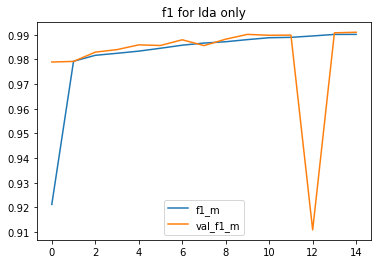

In [28]:
plt.plot(history.history['f1_m'], label='f1_m')
plt.plot(history.history['val_f1_m'], label='val_f1_m')
plt.legend()
plt.title('f1 for lda only')
plt.show()

In [29]:
model.evaluate(X_train,y_train)

3751/3751 [==============================] - 11s 3ms/step - loss: 0.0071 - accuracy: 0.9919 - f1_m: 0.9919


[0.007097883149981499, 0.9918605089187622, 0.9918561577796936]

# Prepare and try test set

In [30]:
test=pd.read_pickle(r'C:\Users\chriq\OneDrive\Documents\my_data\MLdata\test_set.zip' )

In [31]:
test['js_splitted']=test.js.apply(lambda x: x.split())

In [32]:
test.drop(columns='obfuscator_name',inplace=True)

In [33]:
input_list=test.js_splitted.values.tolist()

In [34]:
bow_corpus = [dictionary.doc2bow(doc) for doc in tqdm(input_list)]

100%|██████████████████████████████████████████████████████████████████████████| 37510/37510 [00:12<00:00, 2901.63it/s]


In [35]:
lda_rep=[lda_model.get_document_topics(i,minimum_probability=0.0) for i in tqdm(bow_corpus)]

100%|██████████████████████████████████████████████████████████████████████████| 37510/37510 [00:11<00:00, 3279.97it/s]


In [36]:
train_vecs=[]
for i in tqdm(lda_rep):
    vec=[x[1] for x in i]
    train_vecs.append(vec)
train_vecs

100%|██████████████████████████████████████████████████████████████████████████| 37510/37510 [00:04<00:00, 8147.11it/s]


[[0.0017565476,
  0.0017565545,
  0.0017565454,
  0.0017565456,
  0.0017565476,
  0.0017565454,
  0.0017565468,
  0.9754083,
  0.0017565459,
  0.0017565476,
  0.0017565456,
  0.0017565467,
  0.0017565478,
  0.0017565462,
  0.001756548],
 [0.061001558,
  1.0590882e-05,
  0.004291988,
  0.039638035,
  1.059087e-05,
  1.0590844e-05,
  0.050805535,
  1.0590862e-05,
  1.0590873e-05,
  0.14652917,
  1.05908675e-05,
  1.0590866e-05,
  0.218749,
  0.4765681,
  0.002342488],
 [0.0010582181,
  0.0010582185,
  0.0010582181,
  0.0010582184,
  0.0010582183,
  0.95388997,
  0.0010582182,
  0.0010582182,
  0.0010582181,
  0.0010582183,
  0.0010582181,
  0.0010582181,
  0.03235317,
  0.0010582181,
  0.0010582182],
 [0.00053408137,
  0.00053408137,
  0.061409224,
  0.0005340813,
  0.00053408154,
  0.000534081,
  0.0005340821,
  0.9316477,
  0.00053408113,
  0.0005340818,
  0.0005340812,
  0.0005340812,
  0.00053408125,
  0.0005340812,
  0.00053408154],
 [0.00019790114,
  0.00019790094,
  0.047313496,
 

In [37]:
test['lda_rep']=train_vecs

In [38]:
labels=test.obfuscated_bool.to_numpy()
labels_onehot=pd.get_dummies(labels).values

In [39]:
labels_onehot

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [40]:
nn_input=np.array(test.lda_rep.to_list())
nn_input[0]

array([0.00175655, 0.00175655, 0.00175655, 0.00175655, 0.00175655,
       0.00175655, 0.00175655, 0.9754083 , 0.00175655, 0.00175655,
       0.00175655, 0.00175655, 0.00175655, 0.00175655, 0.00175655],
      dtype=float32)

In [43]:
model.evaluate(nn_input,labels_onehot)

1173/1173 [==============================] - 3s 3ms/step - loss: 0.0068 - accuracy: 0.9922 - f1_m: 0.9922


[0.006791483610868454, 0.9922420978546143, 0.992247462272644]